<a href="https://colab.research.google.com/github/sunnyl94/Data-Analysis-Folder/blob/main/Retail_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **마케팅 고객 데이터 분석**



> Business Problem

> Data Description

출처 https://www.kaggle.com/datasets/darpan25bajaj/retail-case-study-data



In [2]:
# 필요한 library 설치
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 데이터 임포트
customer = pd.read_csv("/content/drive/MyDrive/workspace/Data Analysis/Retail Case Study/data/Customer.csv")
transaction = pd.read_csv("/content/drive/MyDrive/workspace/Data Analysis/Retail Case Study/data/Transactions.csv")
prod_info = pd.read_csv("/content/drive/MyDrive/workspace/Data Analysis/Retail Case Study/data/prod_cat_info.csv")

In [4]:
print("customer: ", customer.shape)
print("transaction: ", transaction.shape)
print("prod_info: ", prod_info.shape)

customer:  (5647, 4)
transaction:  (23051, 10)
prod_info:  (23, 4)


# **1. 데이터 전처리**



In [5]:
# DOB (Date of Birth) 컬럼이 object 타입으로 설정되어 있어 날짜로 변환 필요
customer.dtypes

customer_Id      int64
DOB             object
Gender          object
city_code      float64
dtype: object

In [6]:
customer["DOB"] = pd.to_datetime(customer["DOB"])
customer.dtypes

customer_Id             int64
DOB            datetime64[ns]
Gender                 object
city_code             float64
dtype: object

In [7]:
# null value가 없다
transaction.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

In [8]:
# tran_date 컬럼이 object 타입으로 설정되어 있어 날짜로 변환이 필요
transaction.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
dtype: object

In [9]:
transaction["tran_date"] = pd.to_datetime(transaction['tran_date'])
transaction.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
dtype: object

In [10]:
# null value가 없다
prod_info.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [11]:
# 각 컬럼 타입들이 잘 매칭되어 있다
prod_info.dtypes

prod_cat_code         int64
prod_cat             object
prod_sub_cat_code     int64
prod_subcat          object
dtype: object

## 파생 데이터

> 주문 건수, 취소 건수, 상품 전환율을 분석하기 위해 거래 상태를 구분할 수 있는 컬럼이 필요

> transaction table에 "Order_status" 컬럼을 추가
*   상품이 취소 되었으면 "cancel"
*   상품이 주문 되었으면 "order"







In [12]:
transaction["order_status"] = np.where(transaction["Qty"] < 0, "cancel", "order")
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,cancel
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,cancel
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,cancel
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,cancel
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,cancel


In [13]:
transaction.shape

(23051, 11)



> transaction table에 "confirmed" 컬럼을 추가

1.   상품이 [주문 후 취소] 되었거나 혹은 원래 [취소] 상태였으면 되었으면 "cancel"
2.   상품이 주문 [완료] 되었으면 "confirmed"





In [14]:
# 주문이 완전히 취소된 행만을 추출한 후 "Order_status"를 새로 추가할 "confirmed"라는 컬럼명으로 바꾼다
cancel_confirmed = transaction[transaction["order_status"] == "cancel"][["transaction_id", "order_status"]].drop_duplicates().rename(columns={"order_status":"confirmed"})

# transaction table과 cancel_confirmed table을 합쳐 주문 후 취소한 상품 표시
transaction = pd.merge(transaction, cancel_confirmed, on="transaction_id", how="left")

# NaN value를 주문 되었다는 "confirmed"로 바꾸기
transaction["confirmed"] = transaction["confirmed"].replace(np.nan, "confirm")

transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status,confirmed
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,cancel,cancel
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,cancel,cancel
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,cancel,cancel
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,cancel,cancel
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,cancel,cancel


In [15]:
num_cancel = transaction[transaction["order_status"] == "cancel"]["order_status"].count()
num_order = transaction[transaction["order_status"] == "order"]["order_status"].count()
num_confirm = transaction[transaction["confirmed"] == "confirm"]["confirmed"].count()

print(num_order, num_cancel, num_order - num_cancel, num_confirm)

20876 2175 18701 18819



> 문제: 총 주문 건수에서 총 취소 건수를 뺀 결과값과 "confirmed" 컬럼에서 확정된 총 주문수 불일치<br>
이상치 혹은 결측치가 존재한다는 뜻이기에 제거 필요




## 이상치 / 결측치 데이터 처리

### 이상치

In [16]:
transaction["transaction_id"].value_counts()

4170892941     4
32263938079    4
426787191      4
38053958046    3
89232425133    3
              ..
90835310705    1
36310127403    1
8422252533     1
96247253460    1
77960931771    1
Name: transaction_id, Length: 20876, dtype: int64



> 하나의 transaction id에 최대 2개 row가 존재할 수 있지만 확인 결과 3개 이상의 row가 있는것이 확인 됨




In [17]:
# transaction id는 같아도 tran_date가 다를 수 있기 때문에 drop_duplicates()는 사용 불가
# transaction id와 order_status를 비교 후 중복으로 들어간 행만 제거 필요


# transaction id와 order_status의 내용을 합친 리스트를 만들고 transaction table에 추가
key = map(lambda id, status : str(id) + str(status), transaction["transaction_id"], transaction["order_status"])
transaction["key"] = list(key)
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status,confirmed,key
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,cancel,cancel,80712190438cancel
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,cancel,cancel,29258453508cancel
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,cancel,cancel,51750724947cancel
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,cancel,cancel,93274880719cancel
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,cancel,cancel,51750724947cancel


In [18]:
# transaction table을 cust_id, transaction_id, tran_date 순으로 정렬 
transaction.sort_values(by=["cust_id", "transaction_id", "tran_date"], inplace=True, ignore_index=True)

In [19]:
# duplicate가 있는지 확인
# 1이면 중복이 아니고 0이면 중복
transaction["chk"] = np.where(transaction["key"] != transaction["key"].shift(-1), 1, 0)

# 1인것만 남기기
filtered_trans = transaction[transaction["chk"] == 1].reset_index(drop=True)

In [20]:
num_cancel = filtered_trans[filtered_trans["order_status"] == "cancel"]["order_status"].count()
num_order = filtered_trans[filtered_trans["order_status"] == "order"]["order_status"].count()
num_confirm = filtered_trans[filtered_trans["confirmed"] == "confirm"]["confirmed"].count()

print(num_order, num_cancel, num_order - num_cancel, num_confirm)

20876 2057 18819 18819


### 결측치

In [21]:
# Gender와 city_code 컬럼에 각각 2개의 null value가 존재
customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [22]:
# Gener는 M,F,none으로 세개의 범주를 만들어 결측치 해결
customer.fillna(value={"Gender":"none"}, inplace=True)

In [23]:
# city_code는 최빈값으로 결측치 해결
customer.fillna(value={"city_code":customer["city_code"].mode()[0]}, inplace=True)

## 테이블 조인

> Transaction Table안에 category code가 존재하지만 명칭이 없기 때문에 Transaction table과 prod_cat_info Table을 조인 필요



In [24]:
filtered_trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status,confirmed,key,chk
0,8410316370,266783,2013-02-20,4,1,1,869,91.245,960.245,e-Shop,order,confirm,8410316370order,1
1,16999552161,266783,2013-02-09,10,5,2,835,175.350,1845.350,e-Shop,order,confirm,16999552161order,1
2,25890929042,266783,2011-09-23,1,2,4,1321,554.820,5838.820,e-Shop,order,cancel,25890929042order,1
3,25890929042,266783,2011-09-24,1,2,-4,-1321,554.820,-5838.820,e-Shop,cancel,cancel,25890929042cancel,1
4,98477711300,266783,2012-10-21,4,1,3,93,29.295,308.295,TeleShop,order,confirm,98477711300order,1


In [25]:
prod_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [26]:
# prod_cat_code 컬럼명은 같지만 prod_subcat_code 컬럼명은 다르기 때문에 조인을 쉽게 하기 위해 prod_info 테이블의 컬럼명을 transaction 테이블의 컬럼명과 똑같이 만들어 준다

prod_info.rename(columns= {"prod_sub_cat_code":"prod_subcat_code"}, inplace=True)
prod_info.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [27]:
# prod_info 테이블과 transaction 테이블 조인 진행

new_data = pd.merge(
    left = filtered_trans,
    right = prod_info,
    on = ["prod_cat_code", "prod_subcat_code"],
    how = "left"
)

new_data.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,order_status,confirmed,key,chk,prod_cat,prod_subcat
0,8410316370,266783,2013-02-20,4,1,1,869,91.245,960.245,e-Shop,order,confirm,8410316370order,1,Clothing,Mens
1,16999552161,266783,2013-02-09,10,5,2,835,175.350,1845.350,e-Shop,order,confirm,16999552161order,1,Books,Non-Fiction
2,25890929042,266783,2011-09-23,1,2,4,1321,554.820,5838.820,e-Shop,order,cancel,25890929042order,1,Footwear,Mens
3,25890929042,266783,2011-09-24,1,2,-4,-1321,554.820,-5838.820,e-Shop,cancel,cancel,25890929042cancel,1,Footwear,Mens
4,98477711300,266783,2012-10-21,4,1,3,93,29.295,308.295,TeleShop,order,confirm,98477711300order,1,Clothing,Mens


# **2. 데이터 분석**

## 상품 전환율 (주문 거래 건 중 취소가 발생되지 않고 구매가 확정된 거래 건 비중)

* **가설**: 고관여 상품군의 상품 전환율이 높을 것이다<br>
        고관여 상픔의 특징
        1. 구매 전 상품에 대한 탐색 과정이 길다
        2. 거래 비용 발생이 상대적으로 크다



In [28]:
# prod_cat별 최종 구매 및 취소 수
cvr = new_data.groupby(["prod_cat"])["confirmed"].value_counts().unstack()

# 전체 구매
cvr["total"] = new_data.groupby(["prod_cat"])["confirmed"].count()

# 모든 제품을 위한 total 만들기
sum = cvr.sum()
sum.name = "Total"

cvr = cvr.append(sum.transpose())

# 상품 전환율
cvr["CVR(%)"] = ((cvr["confirm"] / cvr["total"]) * 100).round(1)
display(cvr)

confirmed,cancel,confirm,total,CVR(%)
prod_cat,,,,
Bags,392,1593,1985,80.3
Books,1106,4933,6039,81.7
Clothing,540,2406,2946,81.7
Electronics,784,4093,4877,83.9
Footwear,544,2436,2980,81.7
Home and kitchen,748,3358,4106,81.8
Total,4114,18819,22933,82.1


In [47]:
# prod_subcat별 최종 구매 및 취소 수
cvr_subcat = new_data.groupby(["prod_cat", "prod_subcat"])["confirmed"].value_counts().unstack()

# 전체 구매
cvr_subcat["total"] = new_data.groupby(["prod_cat", "prod_subcat"])["confirmed"].count()

# 상품 전환율
cvr_subcat["CVR(%)"] = ((cvr_subcat["confirm"] / cvr_subcat["total"]) * 100).round(1)
display(cvr_subcat)

confirmed                             cancel  confirm  total  CVR(%)
prod_cat         prod_subcat                                        
Bags             Mens                    188      809    997    81.1
                 Women                   204      784    988    79.4
Books            Academic                194      766    960    79.8
                 Children                192      838   1030    81.4
                 Comics                  188      834   1022    81.6
                 DIY                     160      825    985    83.8
                 Fiction                 202      839   1041    80.6
                 Non-Fiction             170      831   1001    83.0
Clothing         Kids                    166      818    984    83.1
                 Mens                    178      785    963    81.5
                 Women                   196      803    999    80.4
Electronics      Audio and video         142      806    948    85.0
                 Cameras                 166      815    981    83.1
                 Computers               160      796    956    83.3
                 Mobiles                 162      866   1028    84.2
                 Personal Appliances     154      810    964    84.0
Footwear         Kids                    170      831   1001    83.0
                 Mens                    176      761    937    81.2
                 Women                   198      844   1042    81.0
Home and kitchen Bath                    188      829   1017    81.5
                 Furnishing              188      812   1000    81.2
                 Kitchen                 206      829   1035    80.1
                 Tools                   166      888   1054    84.3

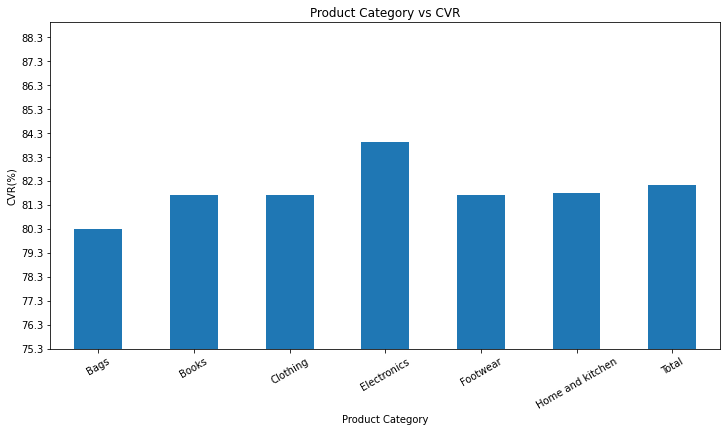

In [30]:
cvr["CVR(%)"].plot(kind="bar", figsize=(12, 6))

plt.xticks(rotation=30, horizontalalignment="center")
plt.ylim(min(cvr["CVR(%)"]) - 5, max(cvr["CVR(%)"])+5)
plt.yticks(np.arange(min(cvr["CVR(%)"] - 5), max(cvr["CVR(%)"]) + 5, 1))
plt.xlabel("Product Category")
plt.ylabel("CVR(%)")
plt.title("Product Category vs CVR")

plt.show()

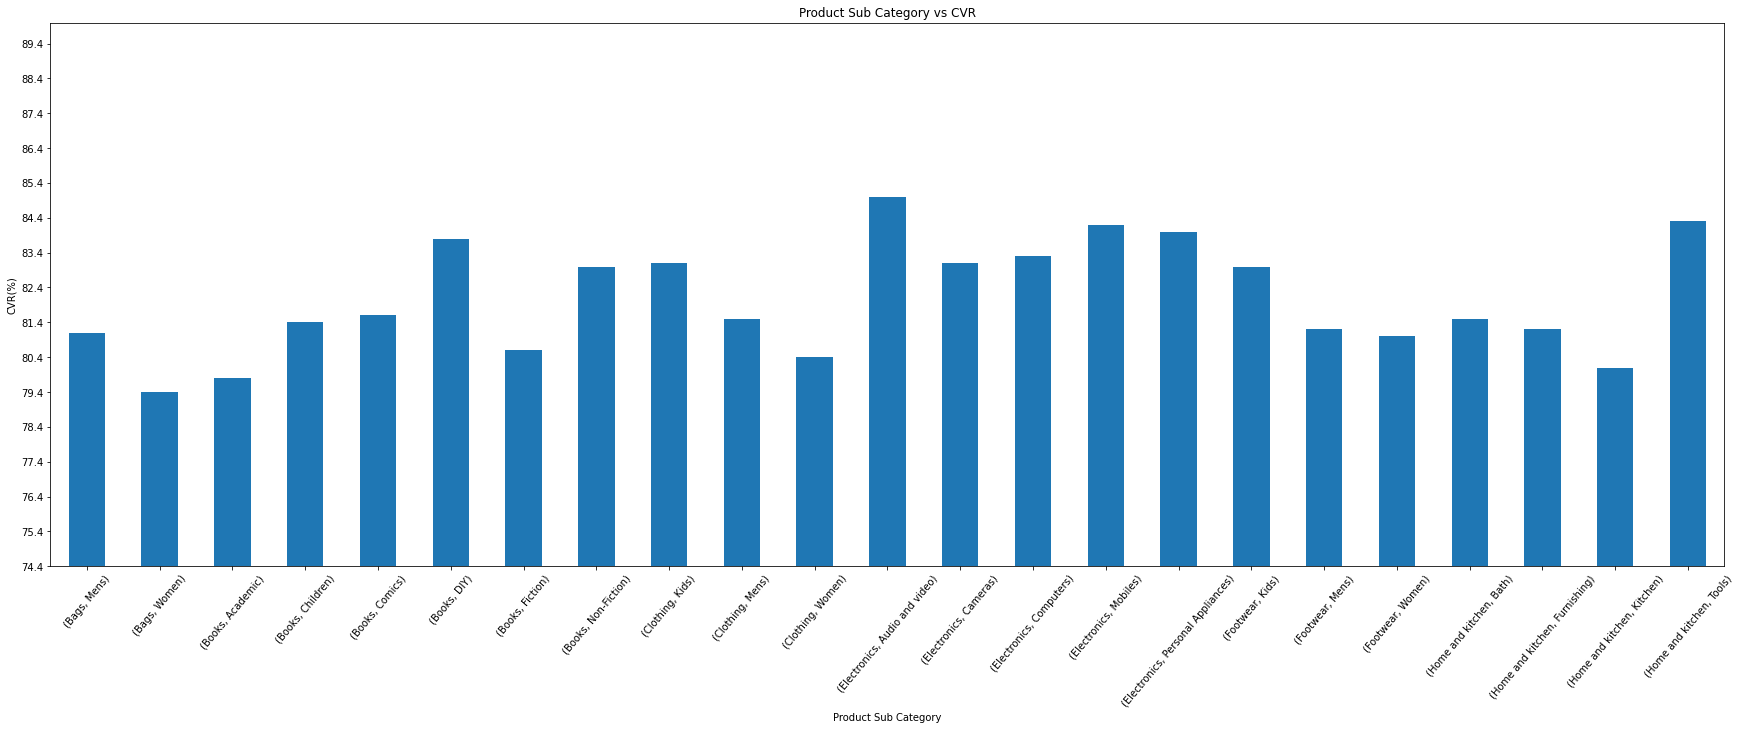

In [31]:
cvr_subcat["CVR(%)"].plot(kind="bar", figsize=(30, 10))

plt.xticks(rotation=50)
plt.ylim(min(cvr_subcat["CVR(%)"]) - 5, max(cvr_subcat["CVR(%)"])+5)
plt.yticks(np.arange(min(cvr_subcat["CVR(%)"] - 5), max(cvr_subcat["CVR(%)"]) + 5, 1))
plt.xlabel("Product Sub Category")
plt.ylabel("CVR(%)")
plt.title("Product Sub Category vs CVR")

plt.show()

In [43]:
min_cvr = min(cvr_subcat["CVR(%)"])
max_cvr = max(cvr_subcat["CVR(%)"])
avg_cvr = cvr["CVR(%)"][-1]

print("최대: ", max_cvr)
print("최소: ", min_cvr)
print("평균: ", avg_cvr)
print("최대 - 최소: ", round(max_cvr - min_cvr,2))
print("최대 - 평균: ", round(max_cvr - avg_cvr,2))
print("최소 - 평균: ", round(min_cvr - avg_cvr,2))

최대:  85.0
최소:  79.4
평균:  82.1
최대 - 최소:  5.6
최대 - 평균:  2.9
최소 - 평균:  -2.7


> **결과 해석**
* 상품 전환율이 높은 대 카테고리는 "Electronics"이며 서브 카테고리는 "Audio and video"이다
    * 이는 고관여 상품으로 분류되는 Electronics 카테고리가 상품 전환율이 크다라는 가설을 뒷받침 할 수 있는 근거이다.
    * 하지만 상품 전환율이 가장 높은 카테고리와 낮은 카테고리의 차이가 **5.6%**로 그 차이가 작고, 평균과의 편차도 작은 편이다.
* 그러므로 카테고리간의 상품 전환율 차이가 유의미하다고 보기 힘들다.

> **새로운 질문**
1. 상품 전환율이 높았던 "Electronics" 카테고리가 다른 카테고리 대비 평균 판매가가 높은가 (고관여 상품인가)?
2. 평균 판매가와 상품 전환율 간 관계가 존재하는가?
    * 가격이 높을수록 상품 전환율이 높아지는지?










In [62]:
# 
pd.pivot_table(new_data,
               index=['prod_cat', 'prod_subcat'],
               columns=['confirmed'],
               values=["transaction_id", 'Rate'],
               aggfunc={'transaction_id':'count',
                        'Rate': np.mean})

Rate             transaction_id        
confirmed                            cancel     confirm         cancel confirm
prod_cat         prod_subcat                                                  
Bags             Mens                   0.0  807.241038            188     809
                 Women                  0.0  777.772959            204     784
Books            Academic               0.0  802.975196            194     766
                 Children               0.0  800.467780            192     838
                 Comics                 0.0  783.027578            188     834
                 DIY                    0.0  780.661818            160     825
                 Fiction                0.0  785.793802            202     839
                 Non-Fiction            0.0  784.143201            170     831
Clothing         Kids                   0.0  796.669927            166     818
                 Mens                   0.0  784.222930            178     785
                 Women                  0.0  779.740971            196     803
Electronics      Audio and video        0.0  777.346154            142     806
                 Cameras                0.0  790.063804            166     815
                 Computers              0.0  788.721106            160     796
                 Mobiles                0.0  784.963048            162     866
                 Personal Appliances    0.0  783.213580            154     810
Footwear         Kids                   0.0  771.872443            170     831
                 Mens                   0.0  789.713535            176     761
                 Women                  0.0  783.633886            198     844
Home and kitchen Bath                   0.0  773.162847            188     829
                 Furnishing             0.0  789.014778            188     812
                 Kitchen                0.0  777.639324            206     829
                 Tools                  0.0  758.575450            166     888